In [6]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from astropy import units as u
from astropy import constants as c
import gc
from tqdm import tqdm

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.injections.pbh import PBHAccretionInjection

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../../matplotlibrc')

In [7]:
model_name_s = ['PRc23', 'PRc10', 'PRc50', 'PRc23B', 'PRc23d', 'PRc23H']
# model_name_s = ['PRc23']

z_s = np.geomspace(4, 1000, 100)

unity = (1 * u.eV/u.s/u.cm**3 / c.c**2).to(u.M_sun/u.yr/u.Mpc**3)

cf_halo_power_s = []
cf_cosmo_power_s = []
cf_total_power_s = []
for name in tqdm(model_name_s):
    inj = PBHAccretionInjection(name, m_PBH=100, f_PBH=1)
    cf_halo_power_s.append(np.array([inj.inj_power(z, debug='halo only') / (1+z)**3 for z in z_s]) * unity.value)
    cf_cosmo_power_s.append(np.array([inj.inj_power(z, debug='cosmo only') / (1+z)**3 for z in z_s]) * unity.value)
    del inj
    gc.collect()
cf_halo_power_s = np.array(cf_halo_power_s)
cf_cosmo_power_s = np.array(cf_cosmo_power_s)
cf_total_power_s = cf_halo_power_s + cf_cosmo_power_s

100%|██████████| 6/6 [00:06<00:00,  1.14s/it]


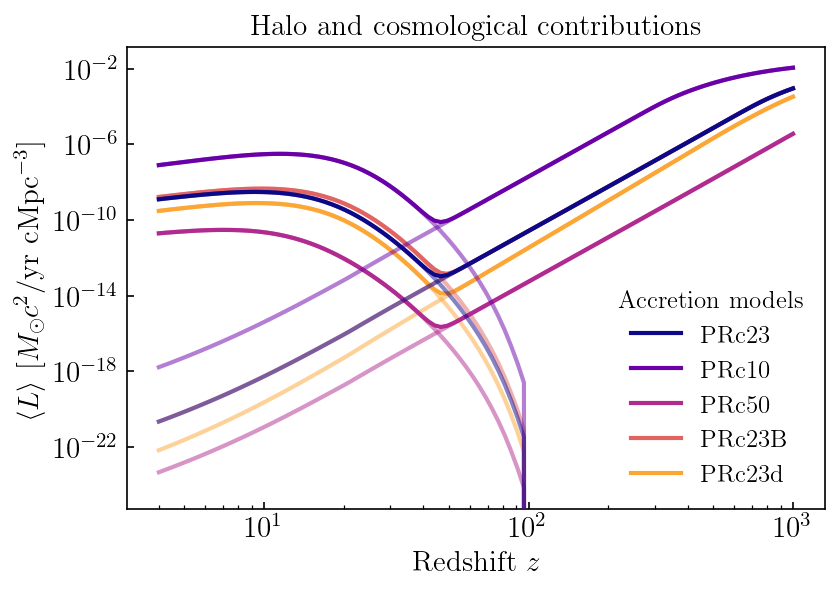

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs

# model_latex_s = [r'PR fid.', r'PR DM-B', r'PR Halo', r'BHL']
model_latex_s = model_name_s
color_s = mpl.colormaps['plasma']([0., 0.2, 0.4, 0.6, 0.8, 0.95])
zorder_s = [6, 5, 4, 3, 2, 1]
ls_s = ['-', '-', '-', '-', '-', '-']

for i in range(len(model_name_s)-1):
    ax.plot(z_s, cf_halo_power_s[i], color=color_s[i], alpha=0.5, zorder=zorder_s[i], ls=ls_s[i])
    ax.plot(z_s, cf_cosmo_power_s[i], color=color_s[i], alpha=0.5, zorder=zorder_s[i], ls=ls_s[i])
    ax.plot(z_s, cf_total_power_s[i], color=color_s[i], label=model_latex_s[i], zorder=zorder_s[i], ls=ls_s[i])
    # ax.plot(0, 0, label=model_latex_s[i], ls=ls_s[i], color='gray')
ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'Redshift $z$', ylabel=r'$\langle L\rangle$ [$M_\odot c^2$/yr cMpc$^{-3}$]', title=r'Halo and cosmological contributions')
ax.legend(frameon=False, title='Accretion models')

# fig.savefig('pbhacc-L-z.pdf', bbox_inches='tight')